In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [57]:
#Read CSV
merge_output = pd.read_csv("./zillow_census_m_OUTPUT.csv")


In [58]:
#Fill NaN with 0 (NaN values are for international migration. We are only interested in domestic migration)
merge_output = merge_output.fillna(0)

In [71]:
#Split County into two County and State columns
county_split = merge_output["County"].str.split(pat=', ', expand=True)
merge_output["State"] = county_split[1]
merge_output.set_index("County")
merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,state,county,2010IN,2010NET,2011IN,2011NET,...,2015 Difference,2016 Difference,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State
0,0,"Acadia County, Louisiana",2082.0,-862.0,660,30,2129.0,-45.0,1996.0,-572.0,...,2800,2100.0,7.008086,-6.675063,0.269906,9.555855,3.439803,3.325416,2.413793,Louisiana
1,1,"Ada County, Idaho",26673.0,4034.0,3136,196,25963.0,3388.0,22795.0,1299.0,...,14500,24400.0,-8.181316,-7.043949,6.282383,15.661182,4.109589,7.338057,11.504008,Idaho
2,2,"Adair County, Missouri",2389.0,643.0,1537,53,2245.0,547.0,2602.0,826.0,...,5400,5400.0,-11.207970,-4.207574,-1.464129,0.000000,5.943536,7.573633,7.040417,Missouri
3,3,"Adams County, Colorado",36313.0,5386.0,1336,167,36404.0,4927.0,36864.0,3041.0,...,35500,31700.0,-3.395785,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462,Colorado
4,4,"Adams County, Idaho",190.0,-97.0,112,21,192.0,-8.0,237.0,123.0,...,11600,38300.0,-10.820669,-3.340150,2.538787,8.940853,5.429293,6.946108,21.444569,Idaho


In [142]:
#Create column that has net total migration/change in price
net_cols = []
dif_cols = []

years = ['2009','2010', '2011', '2012', '2013', '2014']
for year in years:
    year2 = str(int(year) + 1)

    net_cols.append(f"{year}NET")
    dif_cols.append(f"{year2} Difference")

merge_output["TotalNET"] = merge_output[net_cols].sum(axis=1)
merge_output["Total Difference"] = merge_output[dif_cols].sum(axis=1)

merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,state,county,2010IN,2010NET,2011IN,2011NET,...,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State,TotalNet,Total Difference,TotalNET
0,0,"Acadia County, Louisiana",2082.0,-862.0,660,30,2129.0,-45.0,1996.0,-572.0,...,-6.675063,0.269906,9.555855,3.439803,3.325416,2.413793,Louisiana,-2984.0,12800.0,-2984.0
1,1,"Ada County, Idaho",26673.0,4034.0,3136,196,25963.0,3388.0,22795.0,1299.0,...,-7.043949,6.282383,15.661182,4.109589,7.338057,11.504008,Idaho,10771.0,31200.0,10771.0
2,2,"Adair County, Missouri",2389.0,643.0,1537,53,2245.0,547.0,2602.0,826.0,...,-4.207574,-1.464129,0.000000,5.943536,7.573633,7.040417,Missouri,2630.0,-3600.0,2630.0
3,3,"Adams County, Colorado",36313.0,5386.0,1336,167,36404.0,4927.0,36864.0,3041.0,...,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462,Colorado,21234.0,86600.0,21234.0
4,4,"Adams County, Idaho",190.0,-97.0,112,21,192.0,-8.0,237.0,123.0,...,-3.340150,2.538787,8.940853,5.429293,6.946108,21.444569,Idaho,281.0,14100.0,281.0


<Figure size 7200x4800 with 0 Axes>

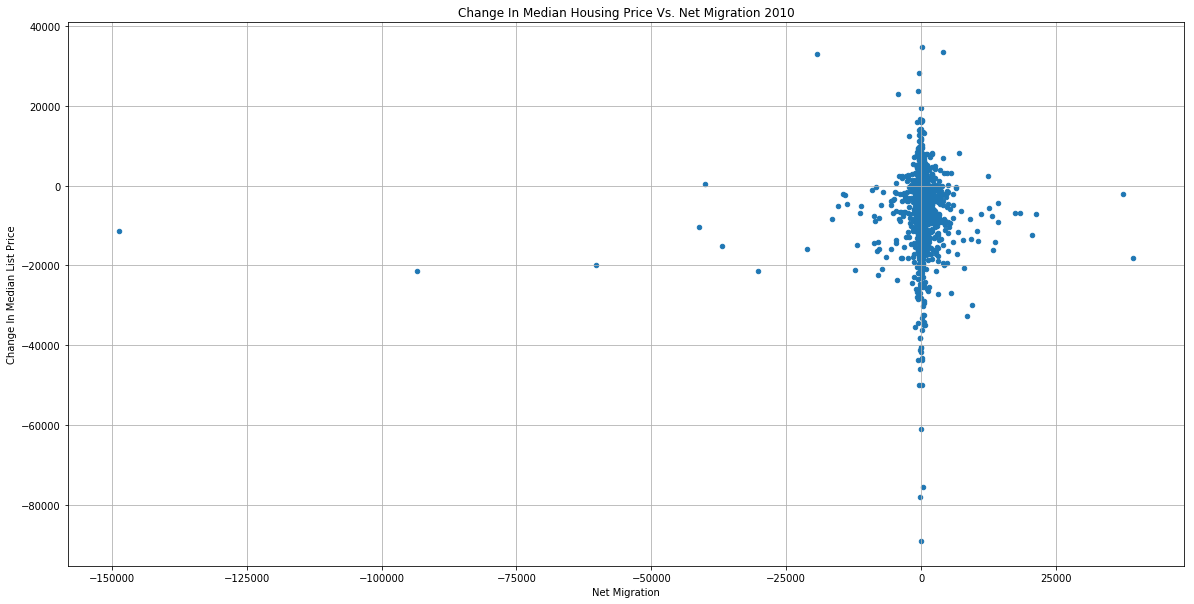

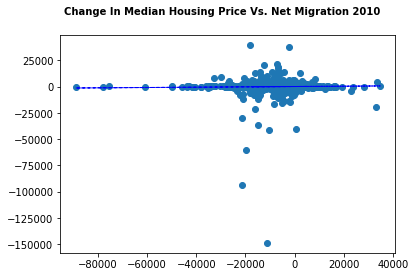

Rsqr: 0.0006265227573371271


<Figure size 7200x4800 with 0 Axes>

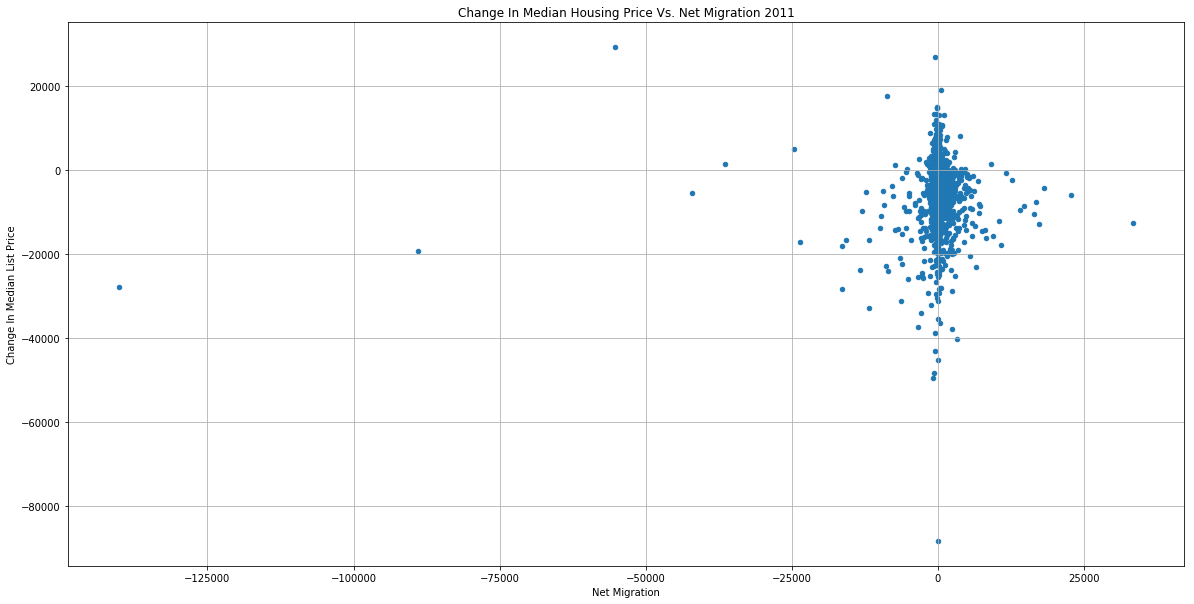

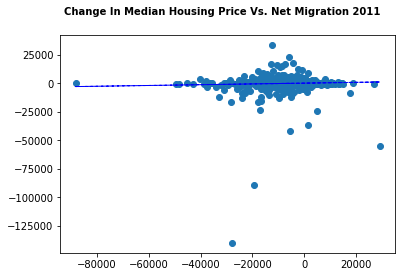

Rsqr: 0.002691371523549963


<Figure size 7200x4800 with 0 Axes>

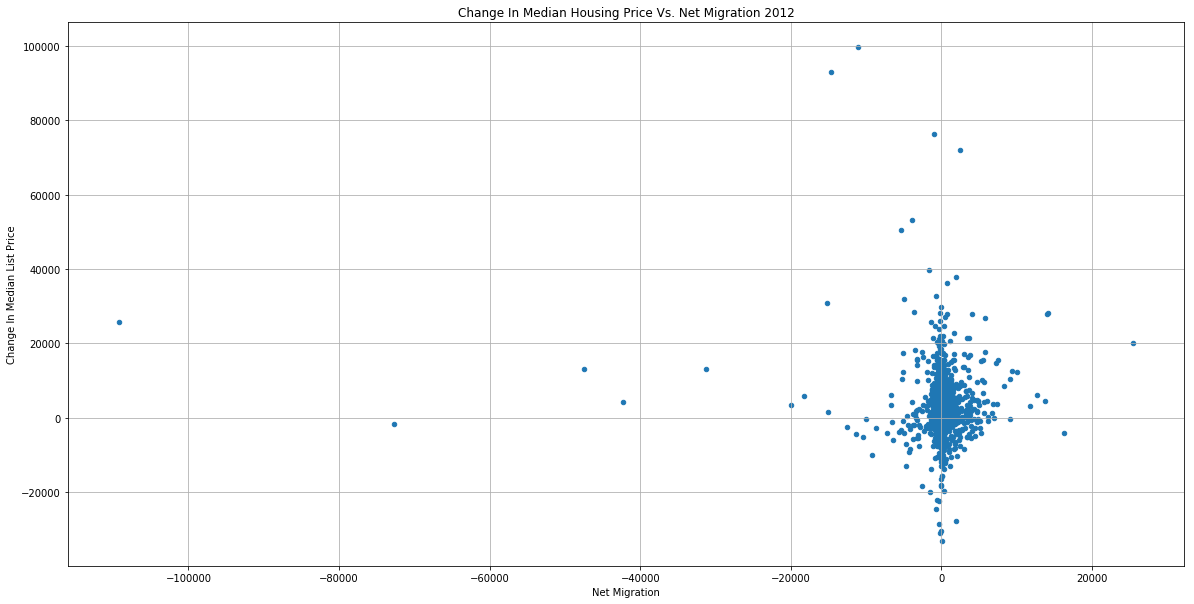

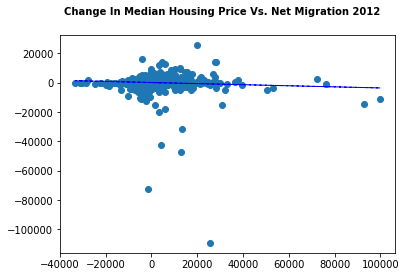

Rsqr: 0.0047731830990299625


<Figure size 7200x4800 with 0 Axes>

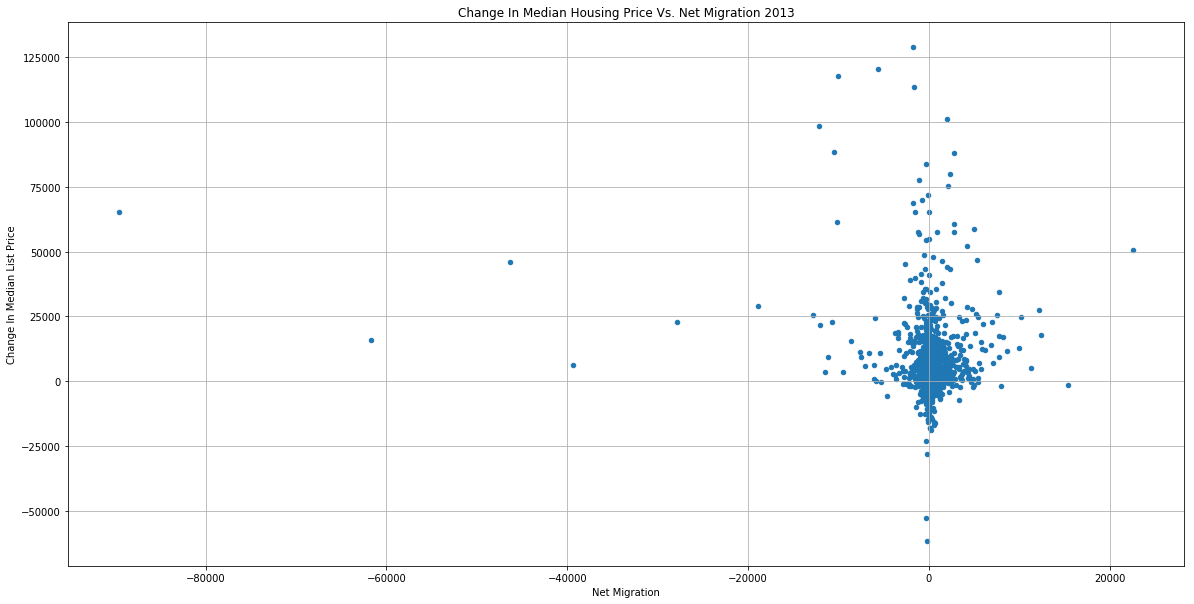

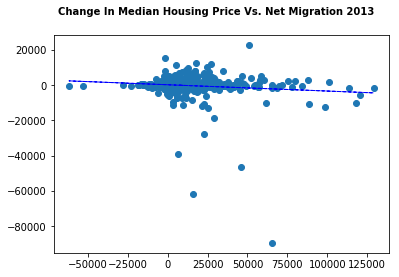

Rsqr: 0.016034220601528017


<Figure size 7200x4800 with 0 Axes>

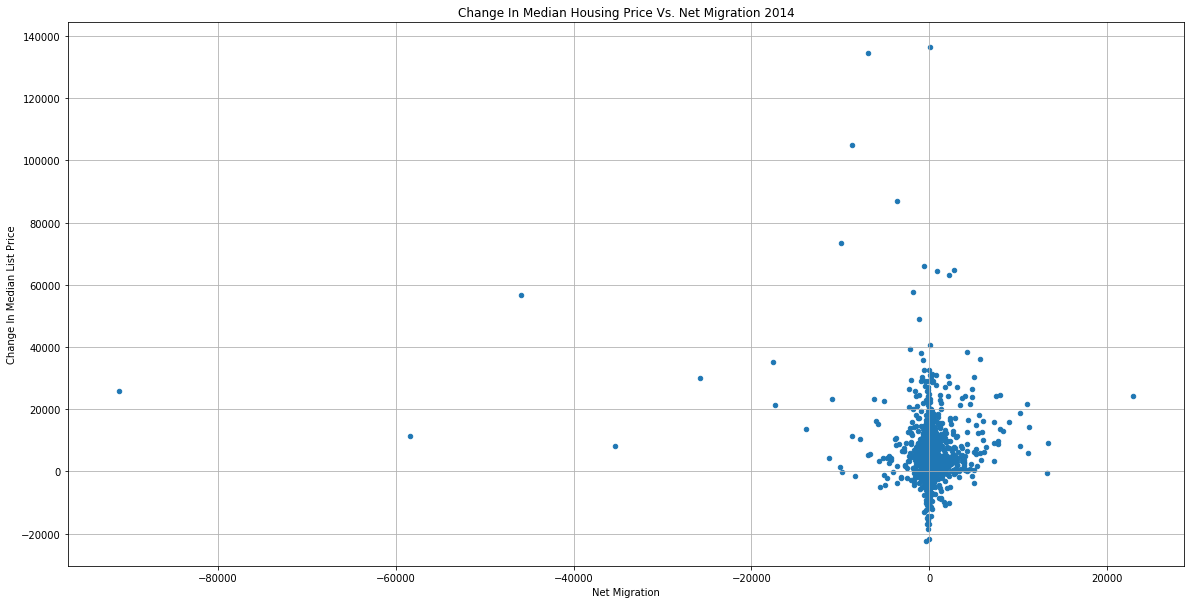

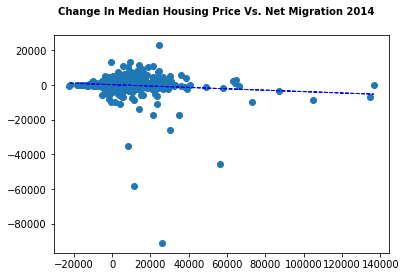

Rsqr: 0.0116226089810366


<Figure size 7200x4800 with 0 Axes>

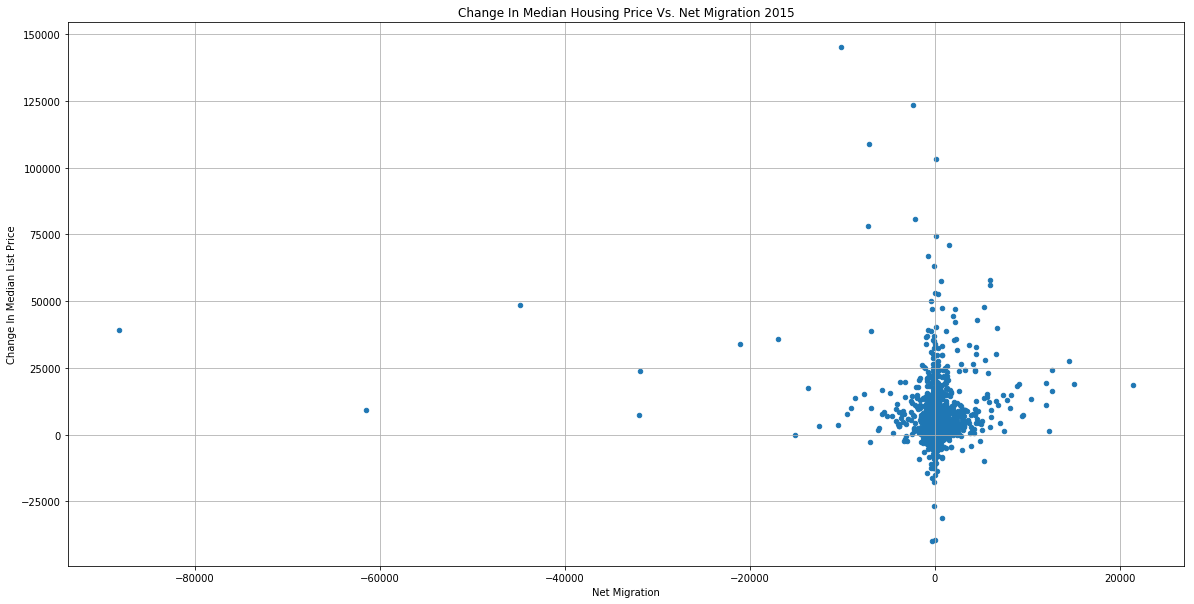

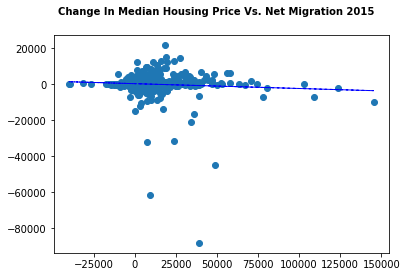

Rsqr: 0.006436648139336527


<Figure size 7200x4800 with 0 Axes>

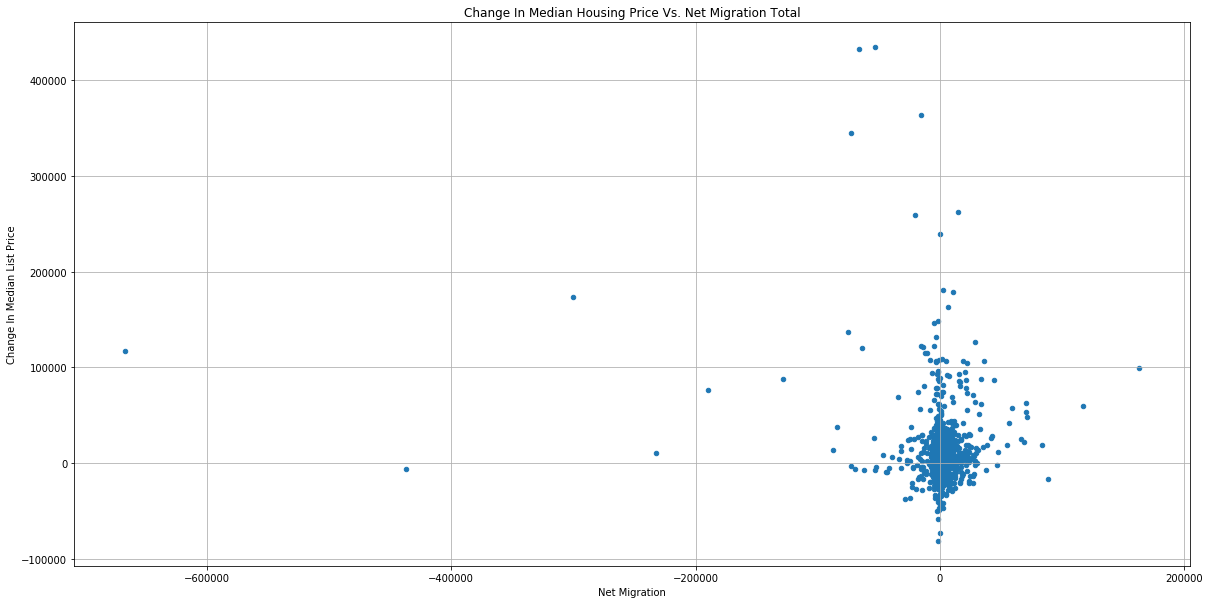

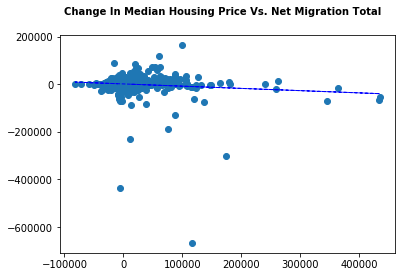

Rsqr: 0.014331531428263473


<Figure size 7200x4800 with 0 Axes>

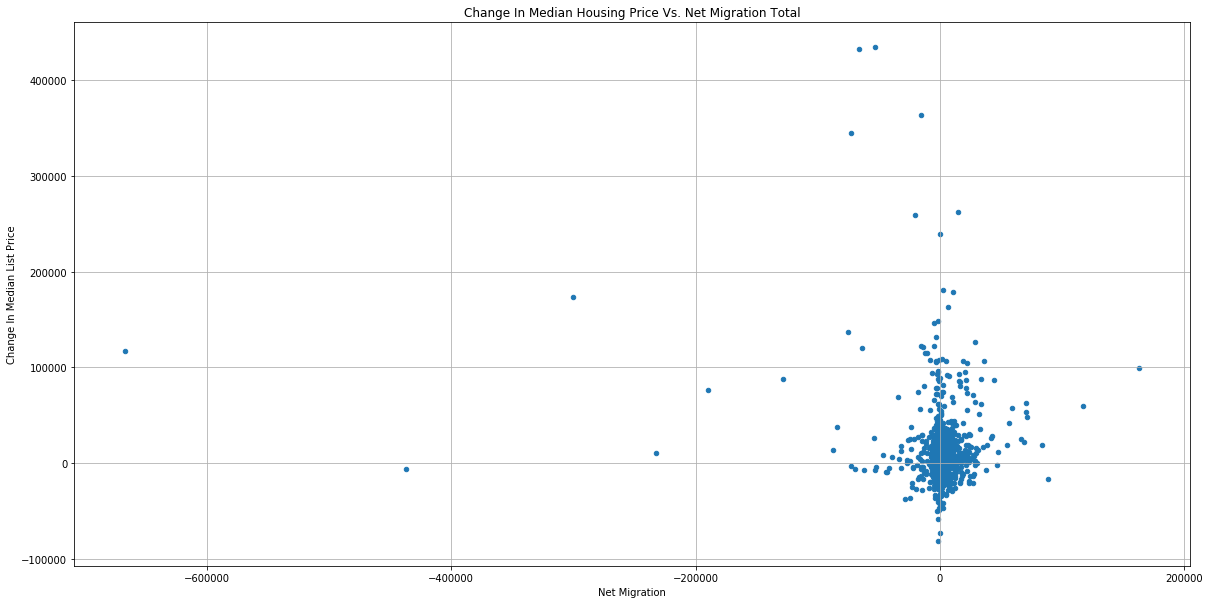

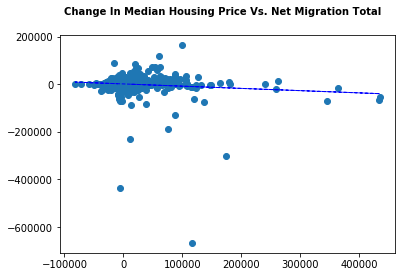

Rsqr: 0.014331531428263473


<Figure size 7200x4800 with 0 Axes>

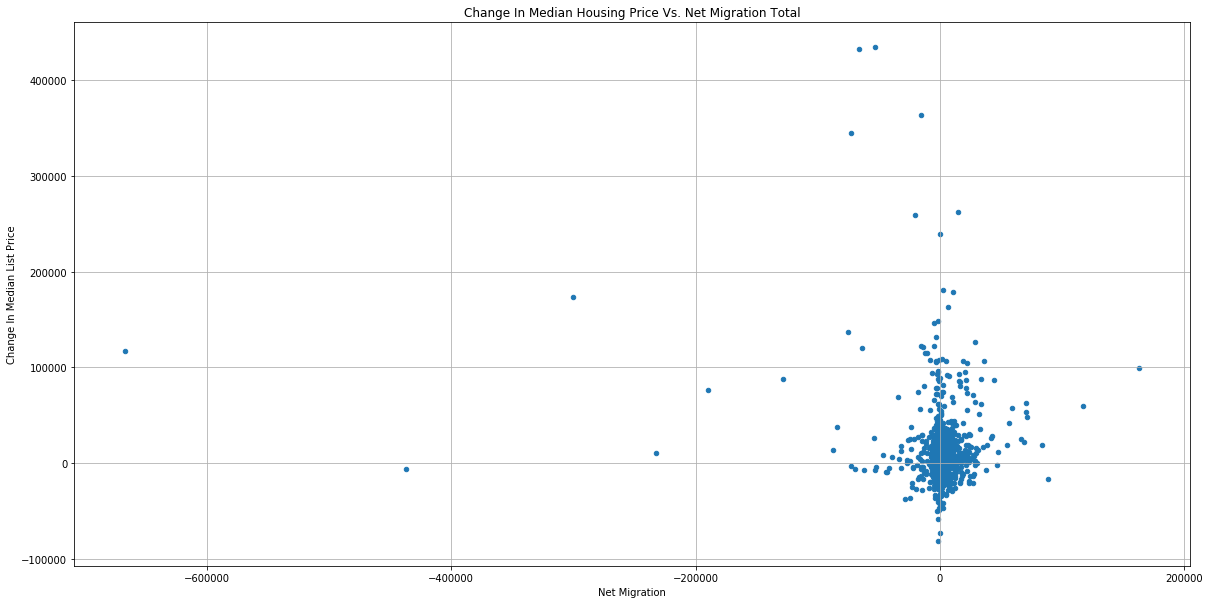

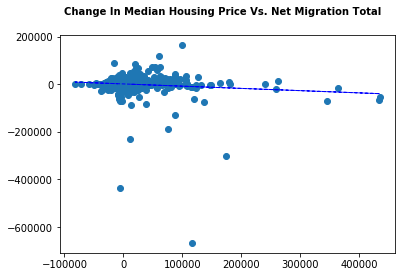

Rsqr: 0.014331531428263473


<Figure size 7200x4800 with 0 Axes>

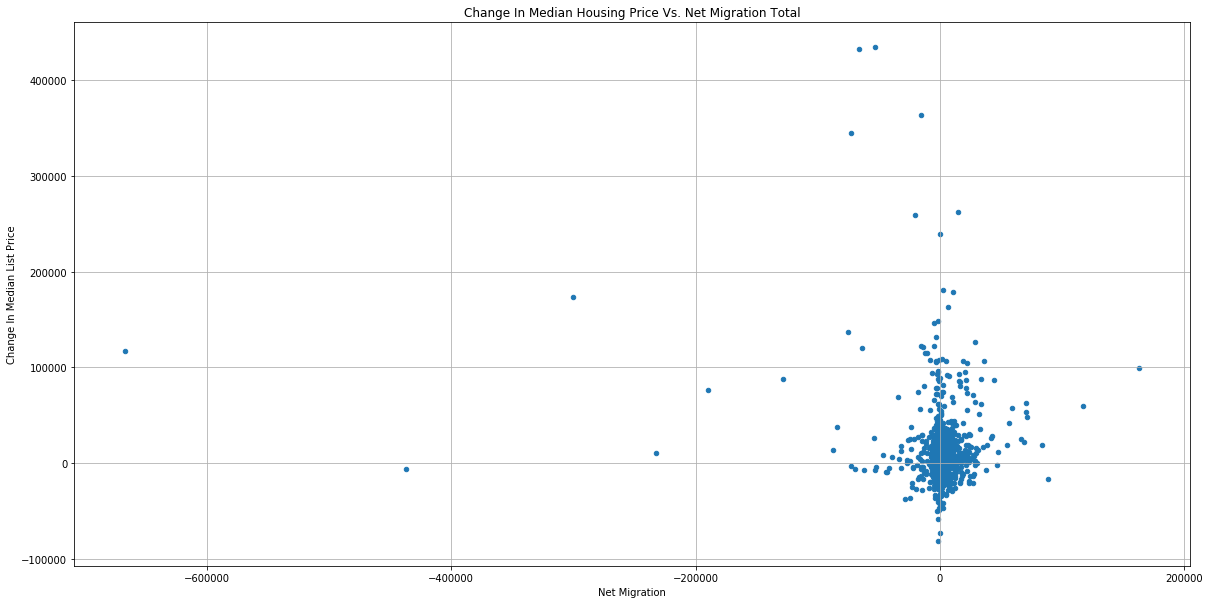

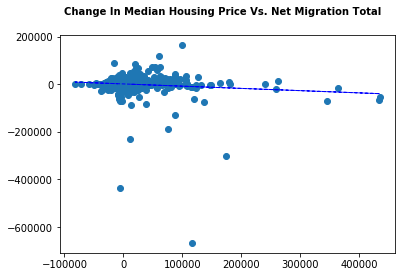

Rsqr: 0.014331531428263473


In [146]:
#Scatterplot compares year of census to year+1 of zillow. Also includes total
years.append("Total")


for year in years:
    #added try so we can include total in loop since you can't add 1 to a string, year2 used for zillow
    try:
         year2 = str(int(year) + 1)
    except: year2 = year
        
    plt.figure(dpi=1200)
   
    merge_output.plot(kind="scatter", x=f"{year}NET", 
                                              y=f"{year2} Difference", 
                                              grid=True, figsize=(20,10),
                                              title=f"Change In Median Housing Price Vs. Net Migration {year2}")

    plt.ylabel("Change In Median List Price")
    plt.xlabel("Net Migration")
    
    difference = merge_output[f"{year2} Difference"]
    moved_net = merge_output[f"{year}NET"]
    
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(difference, moved_net)
    vc_fit = vc_slope * difference + vc_int

    fig, (ax1) = plt.subplots(1, sharex=True)
    fig.suptitle(f"Change In Median Housing Price Vs. Net Migration {year2}", fontsize=10, fontweight="bold")

    #ax1.set_xlim(min(moved_net)-10000, max(moved_net)+10000)
    #ax1.set_ylim(min(difference)-10000, max(difference)+10000)
    ax1.plot(difference, moved_net, linewidth=0, marker="o")
    ax1.plot(difference, vc_fit, "b--", linewidth=1)
    
    plt.savefig(f"Scatter Zil vs Census {year2}.png",dpi = 1000)
    plt.show()
    print("Rsqr:", vc_r**2)